## Load Libraries

In [1]:
import pandas as pd
from fbprophet import Prophet

## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [2]:
df = pd.read_csv('../Data/BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


### Format the Data

In [4]:
df.columns = ['ds','y']

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [6]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [7]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [8]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [9]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [10]:
len(df)

324

In [11]:
len(future)

348


### Step 2: Predict and fill in the Future

In [12]:
forecast = m.predict(future)

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1778.389678,1157.977751,1475.251156,1778.389678,1778.389678,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,0.0,0.0,0.0,1316.488218
1,1992-02-01,1780.987184,1177.055559,1502.380185,1780.987184,1780.987184,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,0.0,0.0,0.0,1353.062229
2,1992-03-01,1783.417109,1436.701234,1765.268141,1783.417109,1783.417109,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,0.0,0.0,0.0,1603.739371
3,1992-04-01,1786.014616,1424.439104,1752.445854,1786.014616,1786.014616,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,0.0,0.0,0.0,1589.923135
4,1992-05-01,1788.528331,1676.180991,1997.706810,1788.528331,1788.528331,45.713009,45.713009,45.713009,45.713009,45.713009,45.713009,0.0,0.0,0.0,1834.241340


In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5204.920380,5097.561801,5393.616496,5193.507576,5217.580881,40.765082,40.765082,40.765082,40.765082,40.765082,40.765082,0.0,0.0,0.0,5245.685462
344,2020-09-01,5221.075787,4919.326537,5245.424017,5208.640369,5235.111980,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,0.0,0.0,0.0,5088.565168
345,2020-10-01,5236.710051,5026.941239,5357.221165,5223.145773,5251.786543,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,0.0,0.0,0.0,5193.429163
346,2020-11-01,5252.865458,5178.578444,5502.704736,5238.051350,5268.938618,87.236362,87.236362,87.236362,87.236362,87.236362,87.236362,0.0,0.0,0.0,5340.101820
347,2020-12-01,5268.499722,6182.560593,6511.253907,5252.537196,5285.895451,1071.594904,1071.594904,1071.594904,1071.594904,1071.594904,1071.594904,0.0,0.0,0.0,6340.094626


In [15]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4632.015644,4473.019137,4780.523033
337,2020-02-01,4682.147555,4525.950789,4839.951218
338,2020-03-01,4945.507893,4783.689209,5111.536645
339,2020-04-01,4945.249558,4789.014733,5116.051003
340,2020-05-01,5202.688312,5028.279364,5365.495741
341,2020-06-01,5183.565324,5017.338947,5335.967297
342,2020-07-01,5316.228164,5155.937773,5480.477465
343,2020-08-01,5245.685462,5097.561801,5393.616496
344,2020-09-01,5088.565168,4919.326537,5245.424017
345,2020-10-01,5193.429163,5026.941239,5357.221165


### Plotting Forecast

We can use Prophet's own built in plotting tools

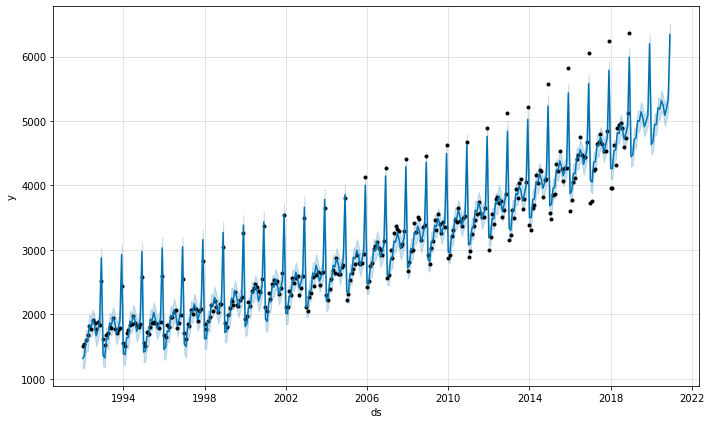

In [19]:
pd.plotting.register_matplotlib_converters()
fig1 = m.plot(forecast)

(735234.0, 738156.0)

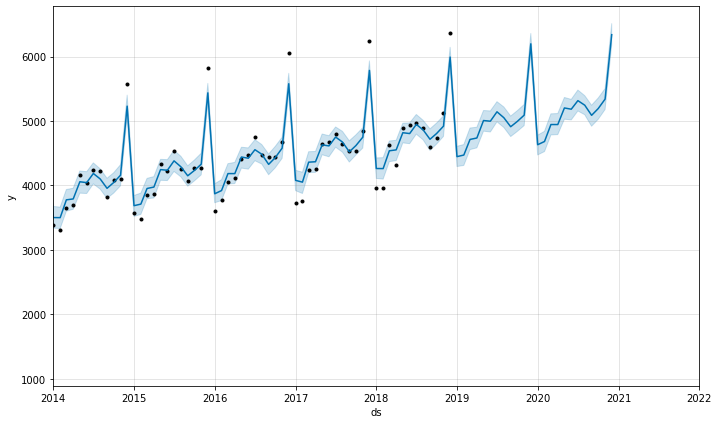

In [20]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

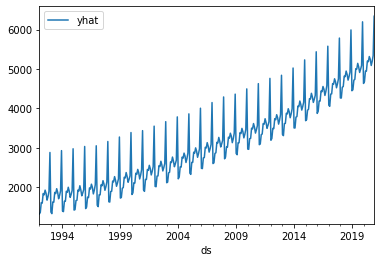

In [21]:
forecast.plot(x='ds',y='yhat')

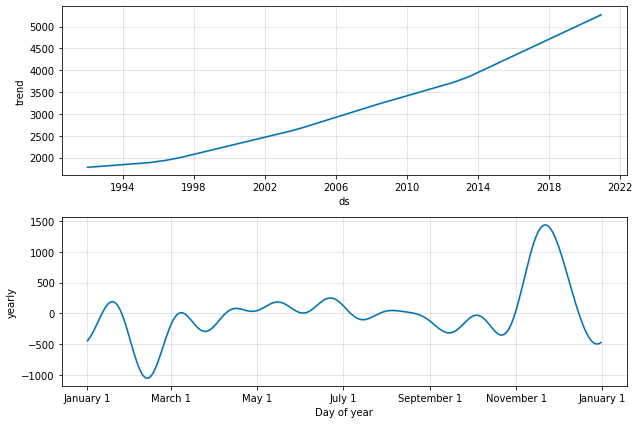

In [22]:
m.plot_components(forecast);


## Great Job!